### comparison of abstracts from risk-sharing and learning
after used LLM classifier to classify the abstracts on the following fields:

**risk-related:**
- **success1**: full risk-sharing, limited risk-sharing
- **success2**: full consumption-smoothing, limited consumption-smoothing

**learning-related:**
- **success1**: everyone informed, not many informed
- **success2**: full adoption, limited adoption

**for both:**
- **benchmark_comparison**: matches theoretical benchmark, falls short of benchmark
- **distributional_effects**: benefits poorest, benefits middle-income, benefits richest, ambiguous
- **evidence_strength**: strong evidence, mixed evidence, weak or inconclusive
- **mechanism_success**: risk mitigated through institutions, risk mitigated through networks, risk not effectively mitigated
- **policy_implication**: suggests effective intervention, suggests partial intervention, suggests no clear intervention
- **long_term_effects**: sustained over time, short-term only, unclear durability
- **narrative_tone**: optimistic, neutral, pessimistic


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# combine files
# Load the data
risk_classified1 = pd.read_csv("risksharing/data/risk_classified1.csv")
risk_df = pd.read_csv("risksharing/data/risk_classified2.csv")

# Add 'success1' and 'success2' from risk_classified1 to risk_classified2
risk_df['success1'] = risk_classified1['success2'] # fix matching problem
risk_df['success2'] = risk_classified1['success1']

# Do the same but for the learning files
learn_classified1 = pd.read_csv("learning/data/learning_classified1.csv")
learn_df = pd.read_csv("learning/data/learning_classified2.csv")

# Add 'success1' and 'success2' from learn_classified1 to learn_classified2
learn_df['success1'] = learn_classified1['success1']
learn_df['success2'] = learn_classified1['success2']

# Fields to summarize
all_fields = [
    "success1", "evidence_strength",
    "mechanism_success", "policy_implication",
    "long_term_effects", "narrative_tone"
]

# Fields to summarize - chosen bc they appear to indicate some differences
fields = [
    "success1", "narrative_tone", "evidence_strength", "mechanism_success", "policy_implication", 
]

### initial overview of classifications
(remember just zero-shot on abstract, so not very robust)

In [35]:
# Display frequencies
for field in all_fields:
    print(f"--- {field} ---")
    print("Risk-sharing papers:")
    print(risk_df[field].value_counts(normalize=True))
    print("Learning papers:")
    print(learn_df[field].value_counts(normalize=True))
    print("\n")

--- success1 ---
Risk-sharing papers:
success1
limited consumption-smoothing    0.959302
full consumption-smoothing       0.040698
Name: proportion, dtype: float64
Learning papers:
success1
not many informed    0.642857
everyone informed    0.357143
Name: proportion, dtype: float64


--- evidence_strength ---
Risk-sharing papers:
evidence_strength
mixed evidence     0.75
strong evidence    0.25
Name: proportion, dtype: float64
Learning papers:
evidence_strength
mixed evidence     0.571429
strong evidence    0.428571
Name: proportion, dtype: float64


--- mechanism_success ---
Risk-sharing papers:
mechanism_success
risk not effectively mitigated         0.465116
risk mitigated through networks        0.267442
risk mitigated through institutions    0.267442
Name: proportion, dtype: float64
Learning papers:
mechanism_success
risk mitigated through networks        0.750000
risk not effectively mitigated         0.160714
risk mitigated through institutions    0.089286
Name: proportion, dtyp

## first classification of success
(again just a quick classification), but notably higher assignment to a full measure of success in learning as opposed to risk sharing.

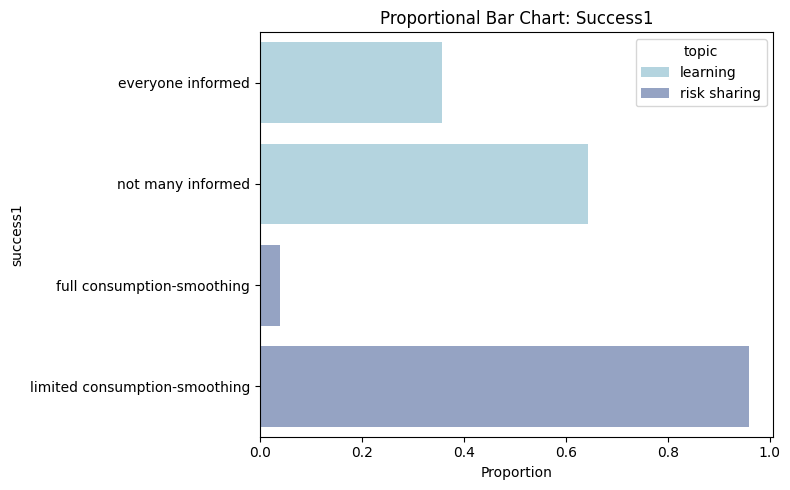

In [36]:
def plot_side_by_side_bars(risk_df, learn_df, field):
    combined = pd.concat([
        risk_df[[field]].assign(topic='risk sharing'),
        learn_df[[field]].assign(topic='learning')
    ])
    counts = (combined
              .groupby(['topic', field])
              .size()
              .reset_index(name='count'))

    counts['proportion'] = counts.groupby('topic')['count'].transform(lambda x: x / x.sum())

    plt.figure(figsize=(8, 5))
    sns.barplot(data=counts, x='proportion', y=field, hue='topic', palette={'learning': 'lightblue', 'risk sharing': '#8da0cb'})
    plt.title(f"Proportional Bar Chart: {field.replace('_', ' ').title()}")
    plt.xlabel("Proportion")
    plt.tight_layout()
    plt.show()

# everyone informed, not many informed + full risk-sharing
plot_side_by_side_bars(risk_df, learn_df, "success1")

### comparison on three other select classifications
Chose narrative tone, mechanism success, evidence strenght, policy implication. Other fields felt like the classification wasn't as clear – could go back and run those too.

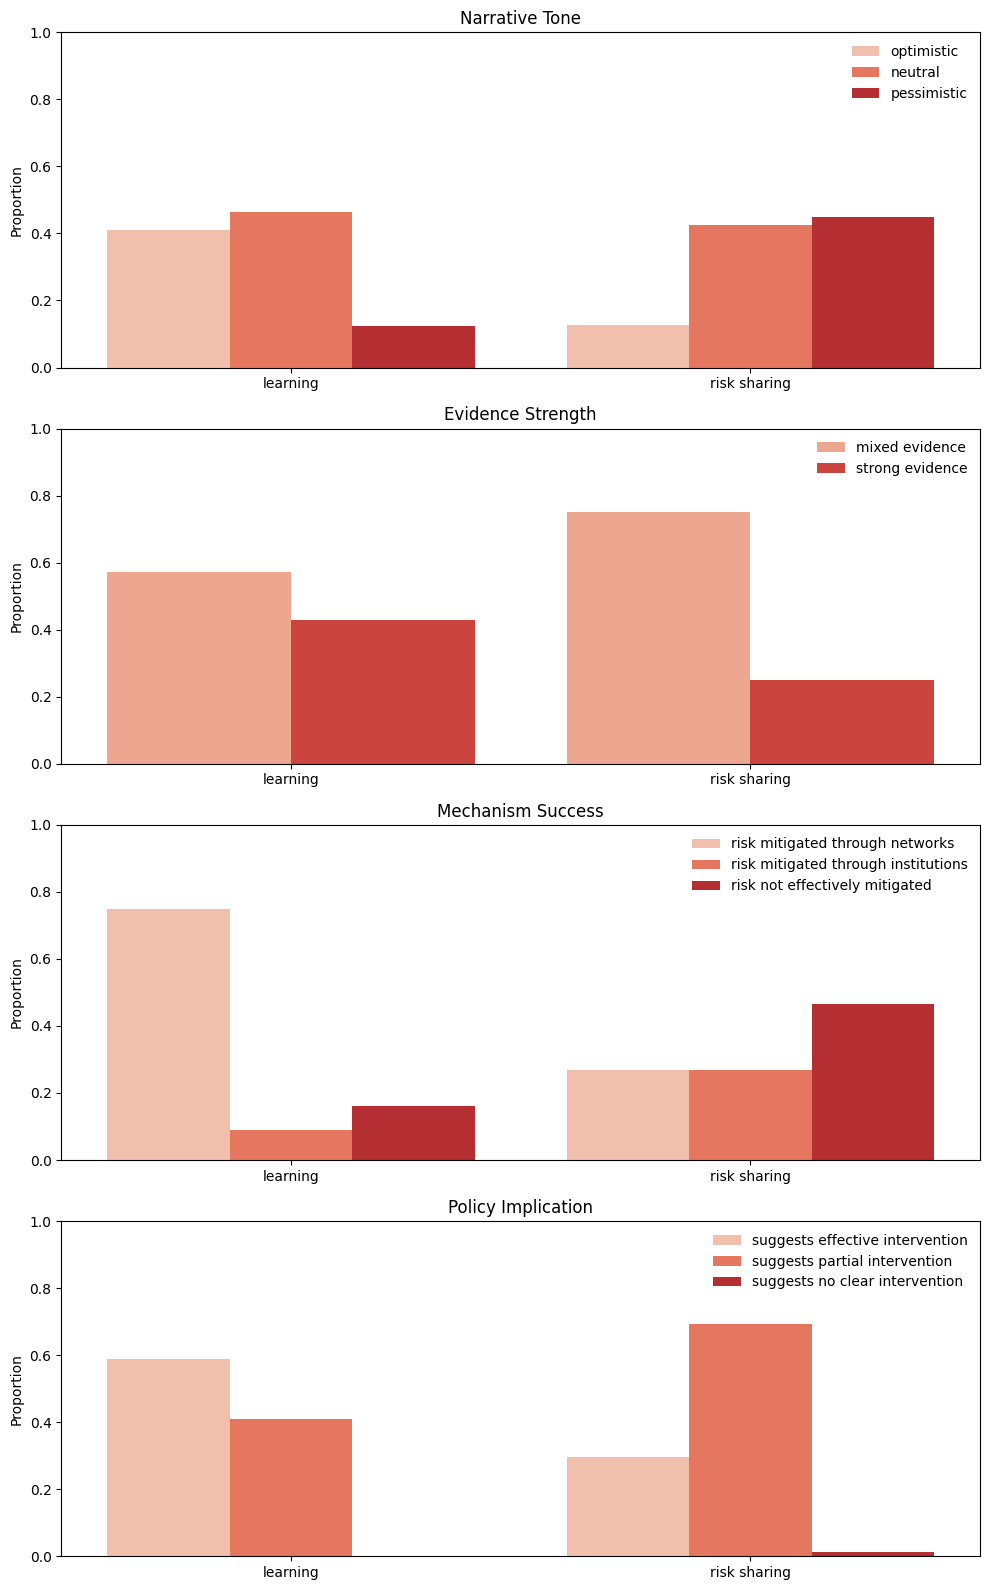

In [37]:
def plot_multi_stacked_proportions(risk_df, learn_df, fields):
    import matplotlib.gridspec as gridspec

    n = len(fields)
    fig = plt.figure(figsize=(10, 4 * n))
    gs = gridspec.GridSpec(n, 1)

    for i, field in enumerate(fields):
        ax = fig.add_subplot(gs[i])

        combined = pd.concat([
            risk_df[[field]].assign(topic='risk sharing'),
            learn_df[[field]].assign(topic='learning')
        ])

        data = (
            combined
            .groupby(['topic', field])
            .size()
            .reset_index(name='count')
        )
        data['proportion'] = data.groupby('topic')['count'].transform(lambda x: x / x.sum())

        # Set custom order for narrative_tone
        if field == "narrative_tone":
            hue_order = ["optimistic", "neutral", "pessimistic"]
        elif field == "mechanism_success":
            hue_order = ["risk mitigated through networks", "risk mitigated through institutions", "risk not effectively mitigated"]
        else:
            hue_order = None

        sns.barplot(
            data=data,
            x='topic',
            y='proportion',
            hue=field,
            ax=ax,
            palette='Reds',
            hue_order=hue_order
        )
        ax.set_title(f"{field.replace('_', ' ').title()}", fontsize=12)
        ax.set_ylabel("Proportion")
        ax.set_xlabel("")
        ax.legend(loc='upper right', frameon=False)
        ax.set_ylim(0, 1)

    plt.tight_layout()
    plt.show()

plot_multi_stacked_proportions(risk_df, learn_df, fields[1:])

Note that the papers on learning are generally rated as more optimistic, with slightly stronger evidence, and more often as suggestive of an effective intervention. Actual values are to be seen with skepticism (limited abstacts, quick LLm work, rough sort on keyword and suitability), but the trend seems to be meaningful to at least some degree.